<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/4_Problems/2_18_Matplotlib Box Plots.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [6]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## 🟩 Data Scientist Hourly Salary Box Plot (2.18.1)

<Axes: >

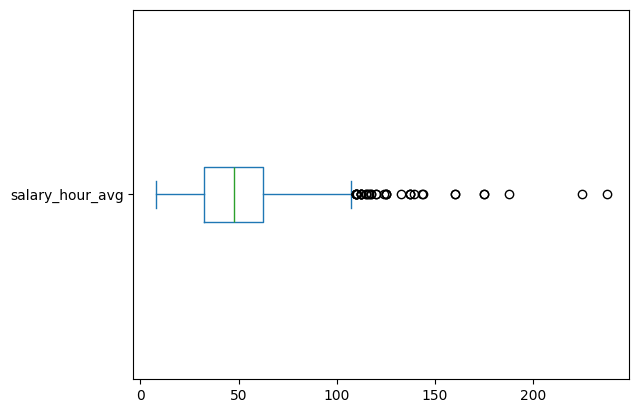

In [51]:
ds_hourly_df = df[df['job_title_short'] == 'Data Scientist'].copy()

ds_hourly_df.dropna(subset='salary_hour_avg')

ds_hourly_df['salary_hour_avg'].plot(kind='box', vert=False)

---

## 🟨 Comparison of Hourly Salaries for Data Analyst (2.18.2)

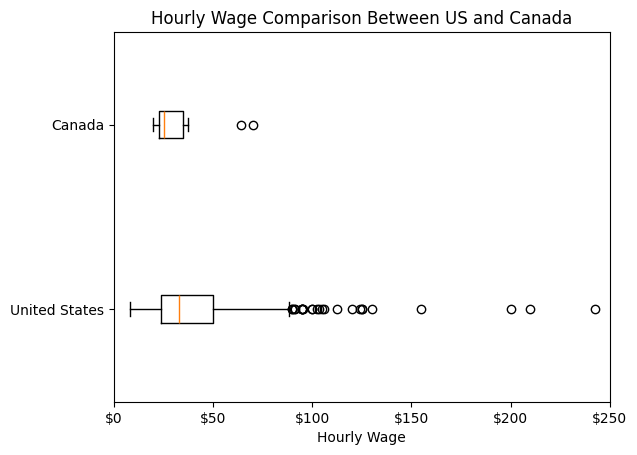

In [ ]:
# Code Needed
countries = ['United States', 'Canada']
series_list = []

hour_sal_df = df[df['job_title_short'] == 'Data Analyst'].copy()
hour_sal_df = hour_sal_df.dropna(subset='salary_hour_avg')

for country in countries:
  series_list.append(hour_sal_df[hour_sal_df['job_country'] == country]['salary_hour_avg'])

plt.boxplot(series_list, vert=False, tick_labels=countries)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x)}'))

plt.title('Hourly Wage Comparison Between US and Canada')
plt.xlabel('Hourly Wage')
plt.xlim(0,250)
plt.show()

---

## 🟥 Comparison of Hourly Salaries in Canada (2.18.3)

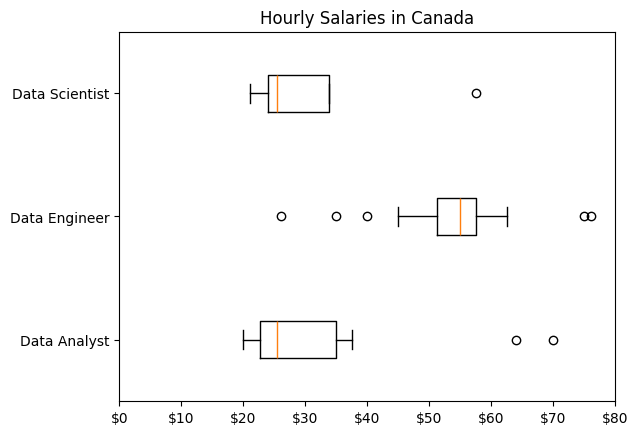

In [54]:
# Code Needed
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
job_series_list = []

can_sal_df = df[df['job_country'] == 'Canada'].copy()

can_sal_df.dropna(subset='salary_hour_avg', inplace=True)

for job in job_titles:
  job_series_list.append(can_sal_df[can_sal_df['job_title_short'] == job]['salary_hour_avg'])

plt.boxplot(job_series_list, vert=False, tick_labels=job_titles)
plt.title('Hourly Salaries in Canada')
plt.xlim(0, 80)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x)}'))


---